# Beli's Math Problem

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import scipy as sp
import scipy.optimize
import math

In [222]:
data = pd.DataFrame(columns=['menge', 'kosten'],
                    data=[[1e-10, 15], [1000, 14], [2000, 11], [3000, 8.5], [4000, 6.75], [5000, 5.75],
                          [7500, 4.50],
                          [10000, 3.5], [15000, 3], [20000, 2.5]])
data.head(15)

,menge,kosten
0,1.000000e-10,15.00
1,1.000000e+03,14.00
2,2.000000e+03,11.00
3,3.000000e+03,8.50
4,4.000000e+03,6.75
5,5.000000e+03,5.75
6,7.500000e+03,4.50
7,1.000000e+04,3.50
8,1.500000e+04,3.00
9,2.000000e+04,2.50


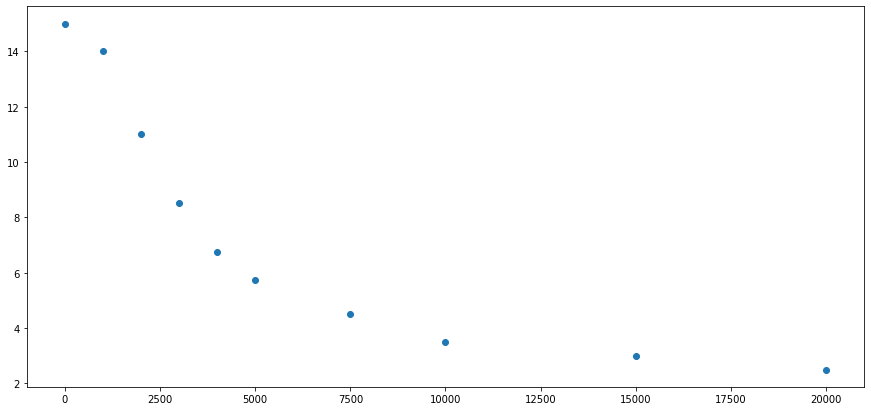

In [223]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['menge'], y=data['kosten'])
plt.show()

min-mse: 0.23004178278844517


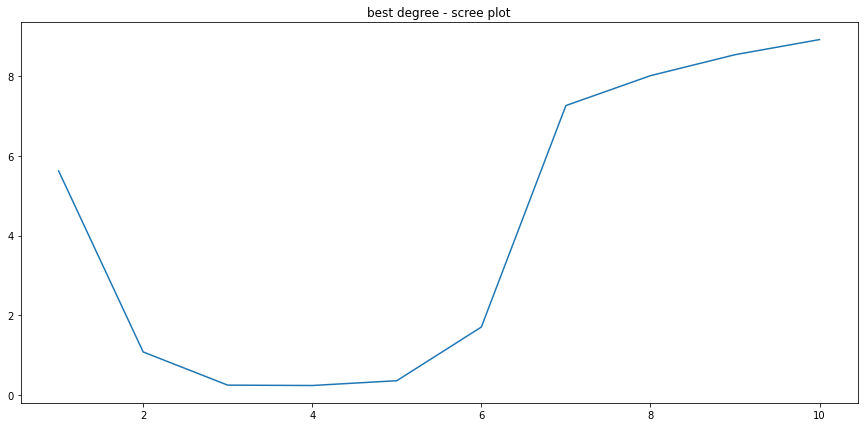

In [224]:
best_degree = 0
min_mse = 99999999
degrees = range(1, 11)
mses = []
for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(data['menge'].values.reshape(-1, 1))
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, data['kosten'].values.reshape(-1, 1))
    mse = mean_squared_error(data['kosten'],
                             pol_reg.predict(poly_reg.fit_transform(data['menge'].values.reshape(-1, 1))))
    if mse < min_mse:
        min_mse = mse
        best_degree = degree
    mses.append(mse)

print('min-mse: ' + str(min_mse))
plt.figure(figsize=(15,7))
plt.plot(degrees, mses)
plt.title('best degree - scree plot')
plt.show()


## Model mit bestem Grad berechnen

In [225]:
print('bester grad: ' + str(best_degree))
poly_reg = PolynomialFeatures(degree=best_degree)
X_poly = poly_reg.fit_transform(data['menge'].values.reshape(-1, 1))
pol_reg = LinearRegression()
pol_reg.fit(X_poly, data['kosten'].values.reshape(-1, 1))
evaluate_at = lambda menge: pol_reg.predict(poly_reg.fit_transform(menge))

bester grad: 4


## Interpolationsplot mit bestem Grad

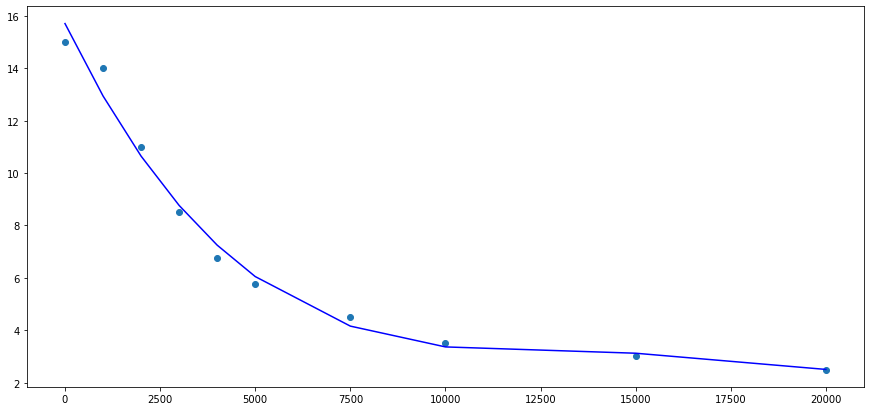

In [226]:
plt.figure(figsize=(15,7))
plt.plot(data['menge'], evaluate_at(data['menge'].values.reshape(-1, 1)), color='blue')
plt.scatter(x=data['menge'], y=data['kosten'])
plt.show()

## Beispielwert für Menge=999

In [227]:
evaluate_at([[999]])

array([[12.94547098]])

# Fitten einer Exponentialzerfallfunktion

In [228]:
def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K


def model_func(t, A, K, C):
    return A * np.exp(K * t) + C


def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=100)
    A, K, C = opt_parms
    return A, K, C

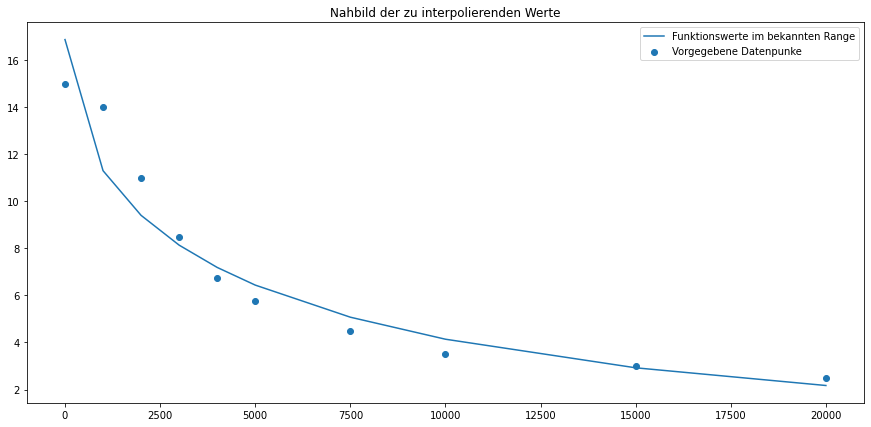

In [229]:
A0, K0, C0 = 2.5, -4.0, 2.0
A, K, C = fit_exp_nonlinear(np.log(data['menge'].values.astype(dtype=np.float128)),
                            np.log(data['kosten'].values.astype(dtype=np.float128)))
fit_y = model_func(np.log(data['menge'].values.astype(np.float128)), A, K, C)
plt.figure(figsize=(15,7))
plt.plot(data['menge'], np.exp(fit_y), label='Funktionswerte im bekannten Range')
plt.scatter(data['menge'], data['kosten'], label='Vorgegebene Datenpunke')
evaluate_exp2 = lambda x: np.exp(model_func(np.log(data['menge'].values.astype(np.float128)), A, K, C))
evaluate_exp = lambda x: np.exp(model_func(np.log(x), A, K, C))
plt.title('Nahbild der zu interpolierenden Werte')
plt.legend()
# ax1.set_title('Non-linear Fit')
plt.show()

## Vorteil Exp-Zerfall (Sinnvolle Werte ausserhalb des vorgegebenen Mengengerüsts)

/tmp/ipykernel_43169/568007103.py:9: RuntimeWarning: divide by zero encountered in log
  evaluate_exp = lambda x: np.exp(model_func(np.log(x), A, K, C))


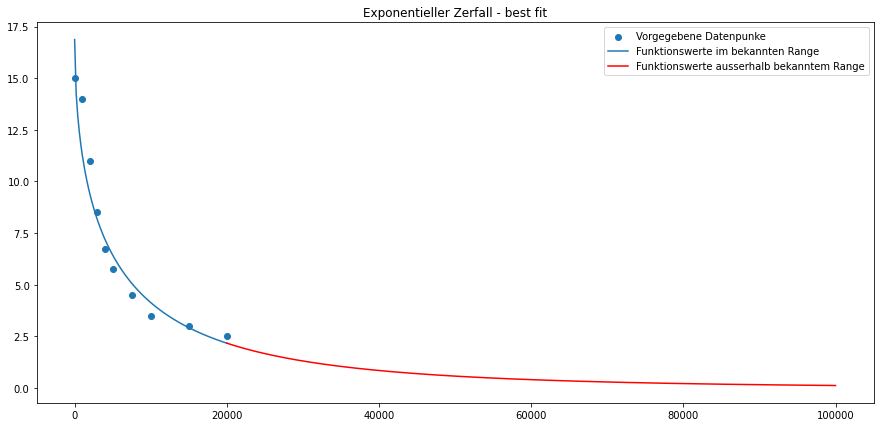

In [230]:
x1 = np.linspace(0, 20000, 100)
x2 = np.linspace(20000, 100000, 500)
y1 = [evaluate_exp(x) for x in x1]
y2 = [evaluate_exp(x) for x in x2]

plt.figure(figsize=(15,7))
plt.scatter(data['menge'], data['kosten'], label='Vorgegebene Datenpunke')
plt.plot(x1, y1, label='Funktionswerte im bekannten Range')
plt.plot(x2, y2, color='red', label='Funktionswerte ausserhalb bekanntem Range')
plt.title('Exponentieller Zerfall - best fit')
plt.legend()
plt.show()

## Vergleich Polynomiallregression und Exponentialzerfall im vorgegebenen Mengengerüst

/tmp/ipykernel_43169/568007103.py:9: RuntimeWarning: divide by zero encountered in log
  evaluate_exp = lambda x: np.exp(model_func(np.log(x), A, K, C))


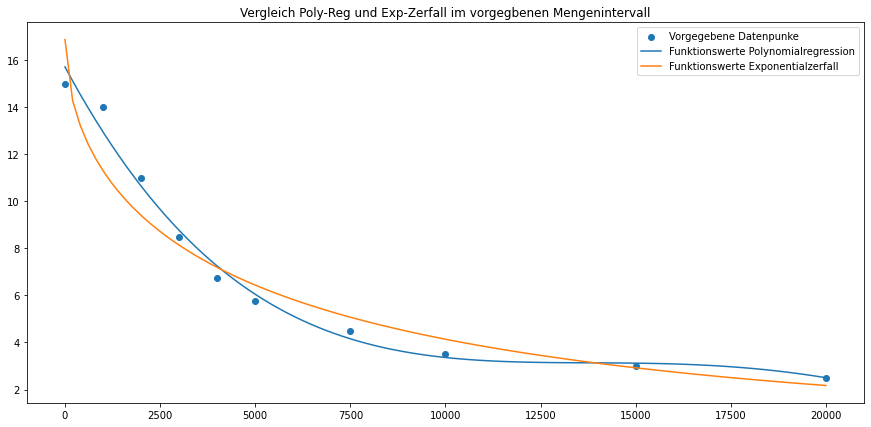

In [232]:
xx = np.linspace(0, 20000, 100)
y_poly = evaluate_at(xx.reshape(-1, 1))
y_exp = [evaluate_exp(x) for x in xx]

plt.figure(figsize=(15,7))
plt.scatter(data['menge'], data['kosten'], label='Vorgegebene Datenpunke')
plt.plot(xx, y_poly, label='Funktionswerte Polynomialregression')
plt.plot(xx, y_exp, label='Funktionswerte Exponentialzerfall')
plt.legend()
plt.title('Vergleich Poly-Reg und Exp-Zerfall im vorgegbenen Mengenintervall')
plt.show()